# 안녕하세요^^ 
## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
% pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv', sep=",", index_col=0, encoding='UTF-8')

In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동인구(합)'].value_counts()

*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [7]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving['이동인구(합)'].replace("*", "2", inplace=True)

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동인구(합)'].value_counts()

2          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [9]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving = seoul_moving.astype({'이동인구(합)': float})

In [10]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
temp = seoul_moving['요일'].value_counts()
temp

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['성별'].value_counts()


M    16355029
F    12568025
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
night_moving = seoul_moving[seoul_moving['도착시간'].isin(range(5))]
night_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
320268,202204,토,4,38000,11240,M,60,HE,90,3.56
320269,202204,토,4,38000,11250,F,55,EH,100,3.25
320270,202204,토,4,39000,11010,M,45,HE,410,3.15
320271,202204,토,4,39000,11190,M,50,EE,140,3.28


In [15]:
night_moving['요일'].value_counts()


토    423995
금    359012
일    331392
목    308651
수    303357
화    292786
월    273062
Name: 요일, dtype: int64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
circle_of_seoul = seoul_moving.loc[
                  (seoul_moving['출발 시군구 코드'] // 1000 == 11) & (seoul_moving['도착 시군구 코드'] // 1000 == 11), :]
circle_of_seoul

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [20]:
region_code = {
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구',
}

In [21]:
# for _ in ('출발', '도착'):
#         circle_of_seoul[f'{_} 시군구 코드'] = circle_of_seoul[f'{_} 시군구 코드'].map(region_code)
# circle_of_seoul[['출발 시군구 코드', '도착 시군구 코드']]

In [22]:
_  # 아래에 실습코드를 작성하고 결과를 확인합니다.

local_fluid = circle_of_seoul.groupby(by=['출발 시군구 코드', '도착 시군구 코드'], as_index=False)
local_income = circle_of_seoul.loc[
    (circle_of_seoul['출발 시군구 코드']) != (circle_of_seoul['도착 시군구 코드']), ['출발 시군구 코드', '도착 시군구 코드', '이동인구(합)']].groupby(
    by=['도착 시군구 코드'], as_index=False)
local_outcome = circle_of_seoul.loc[
    (circle_of_seoul['출발 시군구 코드']) != (circle_of_seoul['도착 시군구 코드']), ['출발 시군구 코드', '도착 시군구 코드', '이동인구(합)']].groupby(
    by=['출발 시군구 코드'], as_index=False)

local_total = circle_of_seoul.loc[
    (circle_of_seoul['출발 시군구 코드']) != (circle_of_seoul['도착 시군구 코드']), ['출발 시군구 코드', '도착 시군구 코드', '이동인구(합)']].groupby(
    by=['출발 시군구 코드', '도착 시군구 코드'], as_index=False)
local_total.describe()

출발 시군구 코드                                                             \
        count     mean  std      min      25%      50%      75%      max   
0     32339.0  11010.0  0.0  11010.0  11010.0  11010.0  11010.0  11010.0   
1     20650.0  11010.0  0.0  11010.0  11010.0  11010.0  11010.0  11010.0   
2     21134.0  11010.0  0.0  11010.0  11010.0  11010.0  11010.0  11010.0   
3     16077.0  11010.0  0.0  11010.0  11010.0  11010.0  11010.0  11010.0   
4     25037.0  11010.0  0.0  11010.0  11010.0  11010.0  11010.0  11010.0   
..        ...      ...  ...      ...      ...      ...      ...      ...   
595   10003.0  11250.0  0.0  11250.0  11250.0  11250.0  11250.0  11250.0   
596    9852.0  11250.0  0.0  11250.0  11250.0  11250.0  11250.0  11250.0   
597   17011.0  11250.0  0.0  11250.0  11250.0  11250.0  11250.0  11250.0   
598   23983.0  11250.0  0.0  11250.0  11250.0  11250.0  11250.0  11250.0   
599   35766.0  11250.0  0.0  11250.0  11250.0  11250.0  11250.0  11250.0   

    도착 시군구 코드           ...                    이동인구(합)                         \
        count     mean  ...      75%      max    count       mean         std   
0     32339.0  11020.0  ...  11020.0  11020.0  32339.0  58.582770  107.252420   
1     20650.0  11030.0  ...  11030.0  11030.0  20650.0  25.837625   33.476767   
2     21134.0  11040.0  ...  11040.0  11040.0  21134.0  22.973341   30.919508   
3     16077.0  11050.0  ...  11050.0  11050.0  16077.0  17.378458   23.627653   
4     25037.0  11060.0  ...  11060.0  11060.0  25037.0  29.134242   41.237936   
..        ...      ...  ...      ...      ...      ...        ...         ...   
595   10003.0  11200.0  ...  11200.0  11200.0  10003.0   8.726142    9.504373   
596    9852.0  11210.0  ...  11210.0  11210.0   9852.0   8.316260    8.781152   
597   17011.0  11220.0  ...  11220.0  11220.0  17011.0  20.972111   50.079031   
598   23983.0  11230.0  ...  11230.0  11230.0  23983.0  37.577850  106.897797   
599   35766.0  11240.0  ...  11240.0  11240.0  35766.0  73.830280  133.649448   

                                         
     min   25%    50%      75%      max  
0    2.0  8.76  23.21  60.6900  2208.77  
1    2.0  5.96  13.24  32.6475   554.71  
2    2.0  5.73  12.21  28.0200   528.25  
3    2.0  4.51   9.30  20.2500   287.63  
4    2.0  6.05  14.15  35.2900   503.72  
..   ...   ...    ...      ...      ...  
595  2.0  3.28   5.95  10.3100   143.16  
596  2.0  3.27   5.45   9.6225   110.44  
597  2.0  4.37   9.28  19.6000   811.62  
598  2.0  5.97  13.97  35.1850  2149.68  
599  2.0  9.47  27.88  86.1975  2952.78  

[600 rows x 24 columns]

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
local_income['이동인구(합)'].agg(['sum', 'mean'])

,sum,mean
도착 시군구 코드,,
11010,12481658.68,28.627132
11020,13069654.11,29.419791
11030,8587605.99,21.571696
11040,9632932.75,23.498053
11050,8575269.77,22.310283
11060,8938327.46,21.759615
11070,6367613.64,18.886085
11080,9714969.00,23.462312
11090,6543956.53,20.586442


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day_moving = seoul_moving[~seoul_moving['도착시간'].isin(range(5))]
day_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,11010,11010,F,10,HE,10,5.96
1,202204,일,5,11010,11010,F,10,WH,10,5.88
2,202204,일,5,11010,11010,F,15,HE,10,4.06
3,202204,일,5,11010,11010,F,15,EW,10,4.06
4,202204,일,5,11010,11010,F,15,EH,10,10.08
...,...,...,...,...,...,...,...,...,...,...
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
a = circle_of_seoul.groupby(by='도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
a.rename(columns={'이동인구(합)': '이동인구(평균)'}, inplace=True)
a

,도착 시군구 코드,평균 이동 시간(분),이동인구(평균)
0,11010,21.443330,41.523063
1,11020,21.166269,41.760859
2,11030,21.553622,34.676168
3,11040,21.950757,39.907793
4,11050,22.779081,43.712430
5,11060,21.985940,37.394532
6,11070,23.849072,38.086766
7,11080,22.508757,42.648641
8,11090,24.282441,36.281421
9,11100,25.102882,35.099543


In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
b = circle_of_seoul.groupby(by='도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
b.rename(columns={'평균 이동 시간(분)': '총 이동 시간(분)'}, inplace=True)
b

,도착 시군구 코드,총 이동 시간(분),이동인구(합)
0,11010,10239340,19827553.13
1,11020,10285410,20293021.43
2,11030,9488120,15264795.74
3,11040,9952210,18093714.50
4,11050,9761770,18732568.44
5,11060,9998260,17005424.97
6,11070,9102380,14536423.71
7,11080,10314120,19542758.96
8,11090,8765160,13096395.71
9,11100,8053130,11260109.02


In [28]:
# 파일을 합쳐볼까요
df_seoul_moving = pd.merge(a, b, how='inner', on='도착 시군구 코드')
df_seoul_moving

,도착 시군구 코드,평균 이동 시간(분),이동인구(평균),총 이동 시간(분),이동인구(합)
0,11010,21.443330,41.523063,10239340,19827553.13
1,11020,21.166269,41.760859,10285410,20293021.43
2,11030,21.553622,34.676168,9488120,15264795.74
3,11040,21.950757,39.907793,9952210,18093714.50
4,11050,22.779081,43.712430,9761770,18732568.44
5,11060,21.985940,37.394532,9998260,17005424.97
6,11070,23.849072,38.086766,9102380,14536423.71
7,11080,22.508757,42.648641,10314120,19542758.96
8,11090,24.282441,36.281421,8765160,13096395.71
9,11100,25.102882,35.099543,8053130,11260109.02


In [29]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df_seoul_moving.to_csv('df_seoul_moving.csv', encoding='UTF-8', index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",  #"NanumGothicCoding",
        rc={"axes.unicode_minus": False},  # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic

In [17]:

circle_of_seoul.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [26]:
circle_of_seoul.loc[circle_of_seoul['이동유형'].isin(['HW', 'WH']), '평균 이동 시간(분)'].value_counts()

20     1023634
10      739263
30      494188
40      161854
50       53025
60       21820
70       11476
80        7066
90        4748
100       3280
110       2239
120       1764
130       1487
140       1095
150        957
170        749
160        741
180        612
190        375
200        245
210        203
220        165
240        143
250        138
230        117
260         91
270         52
280         28
290         18
300          3
Name: 평균 이동 시간(분), dtype: int64

In [28]:
circle_of_seoul.loc[(circle_of_seoul['이동유형'].isin(['HW', 'WH'])) & (
            circle_of_seoul['출발 시군구 코드'] == circle_of_seoul['도착 시군구 코드']), '평균 이동 시간(분)'].value_counts()

10     178756
20      62599
30       5831
40       1735
50        721
60        284
70        144
80         91
90         60
100        35
120        23
110        20
140        13
130        12
150         6
160         3
180         3
170         1
290         1
200         1
250         1
230         1
220         1
190         1
210         1
Name: 평균 이동 시간(분), dtype: int64

In [29]:
circle_of_seoul['이동유형'].unique()

array(['EE', 'EH', 'HE', 'HW', 'WH', 'HH', 'WW', 'WE', 'EW'], dtype=object)

In [30]:
circle_of_seoul.loc[(circle_of_seoul['이동유형'].isin(['HH', 'WW'])) & (
            circle_of_seoul['출발 시군구 코드'] == circle_of_seoul['도착 시군구 코드']), '평균 이동 시간(분)'].value_counts()

10     180982
20      52023
30       6427
40       1740
50        736
60        349
70        195
80        129
90         53
100        47
110        29
120        24
140        13
130        12
150         8
160         7
180         5
170         3
190         3
270         2
220         2
290         1
200         1
260         1
Name: 평균 이동 시간(분), dtype: int64

In [34]:
circle_of_seoul.loc[
(circle_of_seoul['이동유형'].isin(['HH', 'WW'])) & (circle_of_seoul['출발 시군구 코드'] != circle_of_seoul['도착 시군구 코드']), :]

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
225,202204,일,0,11010,11020,F,20,WW,10,2.00
226,202204,일,0,11010,11020,F,20,HH,40,2.00
249,202204,일,0,11010,11020,F,45,HH,10,6.05
260,202204,일,0,11010,11020,F,55,WW,30,3.25
266,202204,일,0,11010,11020,F,60,HH,20,3.67
...,...,...,...,...,...,...,...,...,...,...
920102,202204,토,23,11250,11240,M,50,HH,10,3.30
920110,202204,토,23,11250,11240,M,55,HH,10,6.58
920119,202204,토,23,11250,11240,M,60,HH,10,10.56
920127,202204,토,23,11250,11240,M,65,HH,10,4.06


In [43]:
circle_of_seoul.loc[(circle_of_seoul['이동유형'].isin(['HH', 'WW'])) & (
            circle_of_seoul['출발 시군구 코드'] == circle_of_seoul['도착 시군구 코드']), '나이'].value_counts()

50    16618
25    16613
20    16588
55    16570
60    16532
45    16506
30    16489
40    16478
35    16363
65    16114
15    16092
70    15073
10    13908
75    13452
80    11242
0      8154
Name: 나이, dtype: int64

/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: User

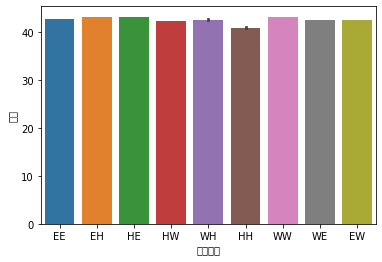

/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: User

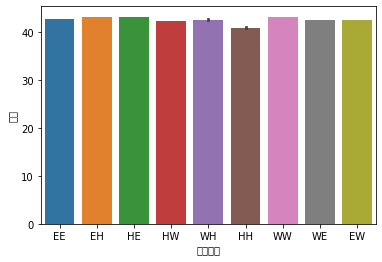

In [42]:
sns.barplot(x='이동유형', y='나이', data=circle_of_seoul)
plt.show()

In [48]:
circle_of_seoul['직장'] = circle_of_seoul.loc[circle_of_seoul['이동유형'].isin(['WH', 'HW', 'WW', 'WE', 'EW'])]

/var/folders/r2/n1xdjd4n1s71yv30fr4vn6th0000gn/T/ipykernel_67580/2735499273.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  circle_of_seoul['직장'] = circle_of_seoul.loc[circle_of_seoul['이동유형'].isin(['WH', 'HW', 'WW', 'WE', 'EW'])]


ValueError: cannot reindex on an axis with duplicate labels

In [47]:
circle_of_seoul.loc[~circle_of_seoul['이동유형'].isin(['WH', 'HW', 'WW', 'WE', 'EW']), : ]

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
4,202204,일,0,11010,11010,F,10,EH,90,5.95
6,202204,일,0,11010,11010,F,15,EH,10,114.23
...,...,...,...,...,...,...,...,...,...,...
920406,202204,토,23,11250,11250,M,75,HE,20,17.79
920409,202204,토,23,11250,11250,M,75,EH,10,101.22
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99


In [ ]:
circle_of_seoul['직장']

In [ ]:
circle_of_seoul.loc[]